# Objective: To Perform an Exploratory Data Analysis (EDA) on 'Medical Premium' data to determine what factors play an important role in determining the premium of the user.

Dataset : The given data set contains a user's medical history in the form of whether they have a specific condition or not, their age, height, weight, etc along with the premium they have to pay in INR for insurance.

# Importing the Libraries :

In [1]:
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
import os
warnings.filterwarnings("ignore")

# Importing and reading the dataset "Medical Premium" :

In [2]:
Dataset = pd.read_csv(r"C:\\Users\\Surajit Patra\\opencv\\Scripts\\Medicalpremium.csv")  
print("Imported successfully")

Imported successfully


In [3]:
Dataset.shape   # total rows and colums i.e shape of dataset

(986, 11)

The data set has 986 rows and 11 columns.

In [4]:
Dataset.head(5)   # Printing first 5 rows of the dataset

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [5]:
Dataset.tail(5)   # Printing last 5 rows of the dataset

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000
985,21,0,0,0,0,158,75,1,0,1,15000


In [6]:
Dataset.info()  # Checking for missing values and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


From above it can be seen there are no null records in the dataset and data type is an integer.

In [7]:
Dataset.describe() # Description of the data set

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


From the description of the dataset it can concluded that following significant observations are as follows:
    
    1.Minimum age of user is 18, while maximum is 66.
    2.Minimum height of the user recorded is 145 while maximum is 188.
    3.Again, minimum weight of the user is 51 while maximum is 132.
    4.Minimum Premium Price that User Pays is 15000 and Maximum Premium Price is 40000 while on an average user pays 24337       premium price. 

# Visualization of Data

## 1. Showing correlation between the columns using Heatmap:

Text(0.5, 1.0, 'Correlation Matrix')

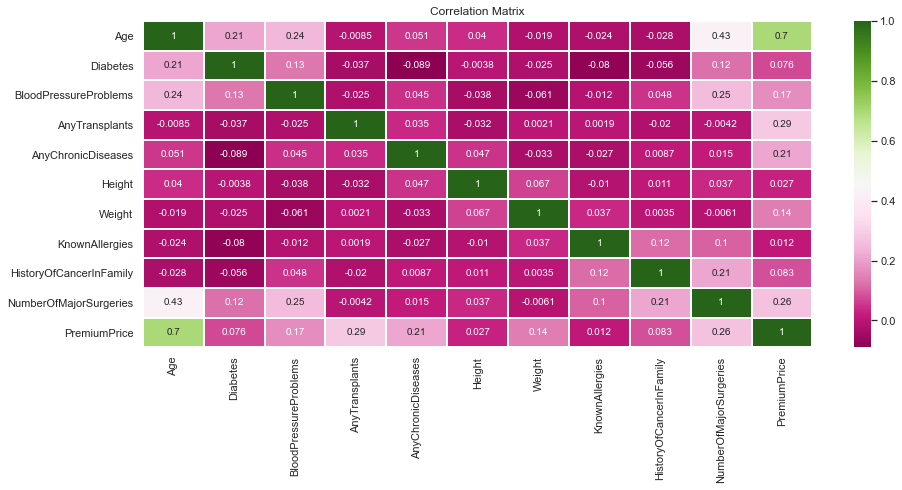

In [8]:
plt.figure(figsize=(15, 6))
sns.heatmap(Dataset.corr(), annot=True, cmap="PiYG", linewidths=2)
plt.title("Correlation Matrix")

From the above Heatmap we can infer the following:

1."Age" and "Premium Price" is strongly correlated.

2."AnyTransplants", "AnyChronicDiseases" and "Number of MajorSurgeries" are somewhat correlated with "Premium Price". 

3.'Height' and 'KnownAllergies' are least correlated to "Premium Price".

## 2. Distribution of Premium Price

<AxesSubplot:title={'center':'Distribution of Premium Price'}, xlabel='PremiumPrice', ylabel='count'>

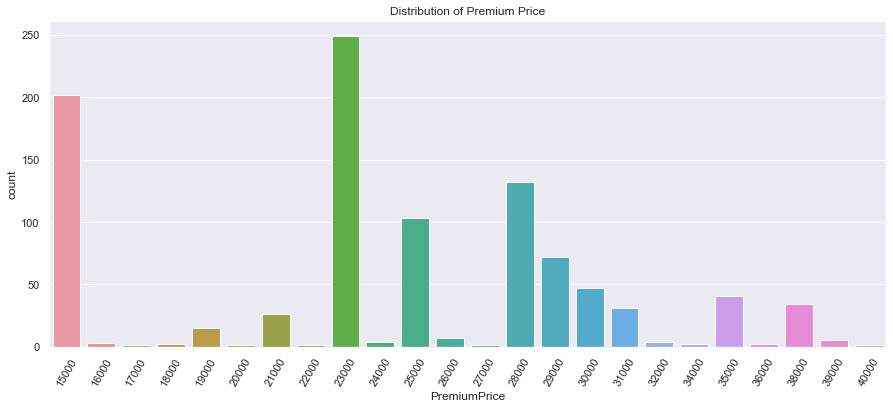

In [9]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=60)
plt.title("Distribution of Premium Price")
sns.countplot(x="PremiumPrice", data=Dataset)

Premium Price of 23000 shows the maximum count suggesting most of the users pay the premium price of 23000.

In [10]:
# Unique value count of each column
for i in Dataset.columns:
    print(i, len(Dataset[i].unique()))

Age 49
Diabetes 2
BloodPressureProblems 2
AnyTransplants 2
AnyChronicDiseases 2
Height 44
Weight 74
KnownAllergies 2
HistoryOfCancerInFamily 2
NumberOfMajorSurgeries 4
PremiumPrice 24


In [11]:
# Distinguishing the attributes based on their uniqueness
binary_feature = [i for i in Dataset.columns if (len(Dataset[i].unique()) == 2)]
target_feature = "PremiumPrice"

## 3.Countplot for Binary features and the Barplot for binary along with target feature.

<AxesSubplot:xlabel='HistoryOfCancerInFamily', ylabel='PremiumPrice'>

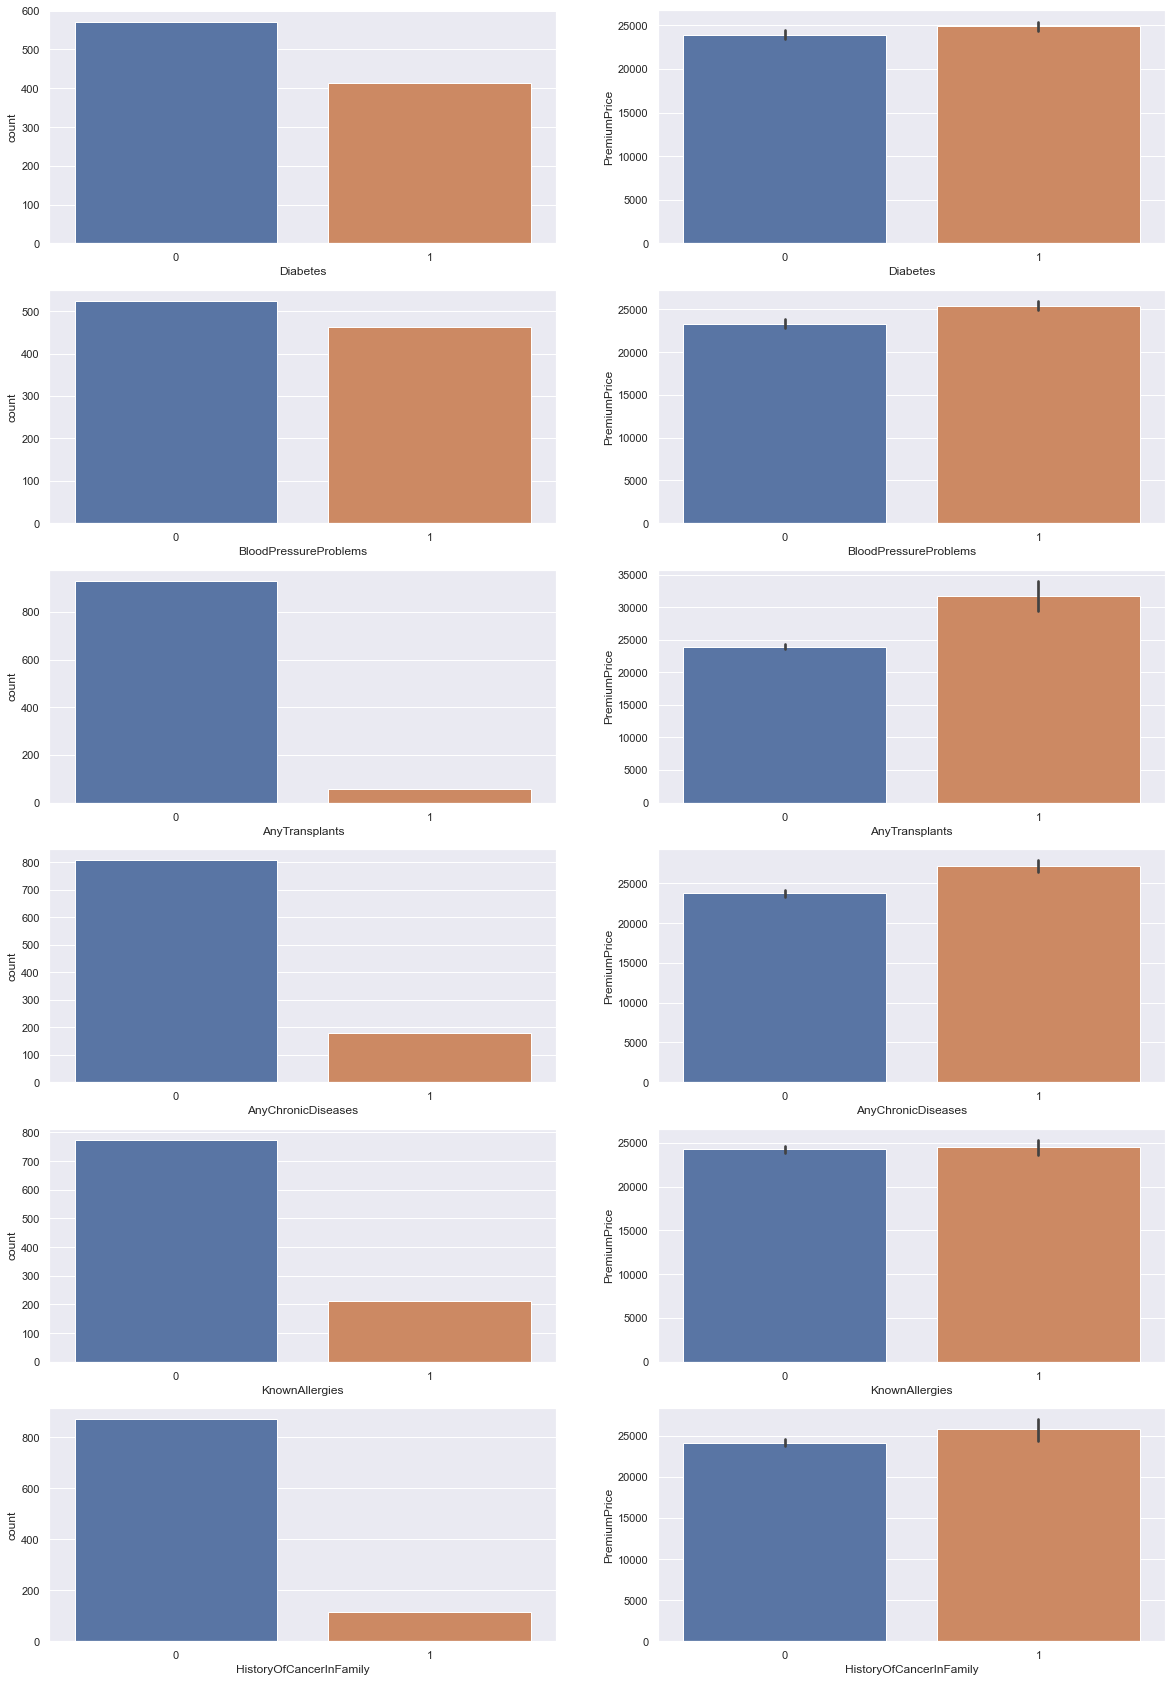

In [12]:
fig, ax = plt.subplots(6, 2, figsize=(20, 30))
sns.countplot(ax=ax[0, 0], data=Dataset, x=binary_feature[0])
sns.barplot(ax=ax[0, 1], data=Dataset, x=binary_feature[0], y=target_feature)
sns.countplot(ax=ax[1, 0], data=Dataset, x=binary_feature[1])
sns.barplot(ax=ax[1, 1], data=Dataset, x=binary_feature[1], y=target_feature)
sns.countplot(ax=ax[2, 0], data=Dataset, x=binary_feature[2])
sns.barplot(ax=ax[2, 1], data=Dataset, x=binary_feature[2], y=target_feature)
sns.countplot(ax=ax[3, 0], data=Dataset, x=binary_feature[3])
sns.barplot(ax=ax[3, 1], data=Dataset, x=binary_feature[3], y=target_feature)
sns.countplot(ax=ax[4, 0], data=Dataset, x=binary_feature[4])
sns.barplot(ax=ax[4, 1], data=Dataset, x=binary_feature[4], y=target_feature)
sns.countplot(ax=ax[5, 0], data=Dataset, x=binary_feature[5])
sns.barplot(ax=ax[5, 1], data=Dataset, x=binary_feature[5], y=target_feature)

From the above plots the following can be inferred:
    
    1. Count of "Diabetes" and "Blood Pressure Problems" are quite high compare to other diseases.
    
    2. User with "Any Transplant", "Any Chronic disease" and "history of Cancer" in family tend to pay higher                   "premium price" than user who don't have such diseases.

## 4.Distribution of Number of Major Surgeries

Text(0.5, 1.0, 'Distribution of Number of Major surgeries')

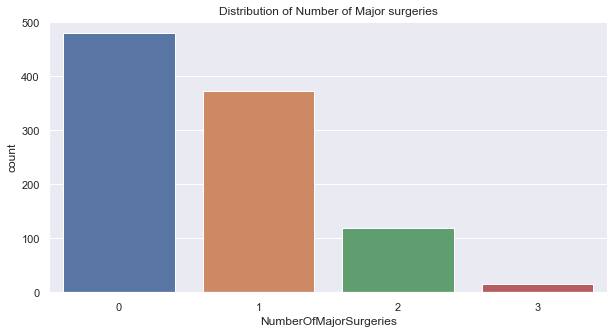

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x="NumberOfMajorSurgeries", data=Dataset)
plt.title("Distribution of Number of Major surgeries")

## 5.Number Of Major Surgeries vs Premium Price

Text(0.5, 1.0, 'Number Of Major Surgeries vs Premium Price')

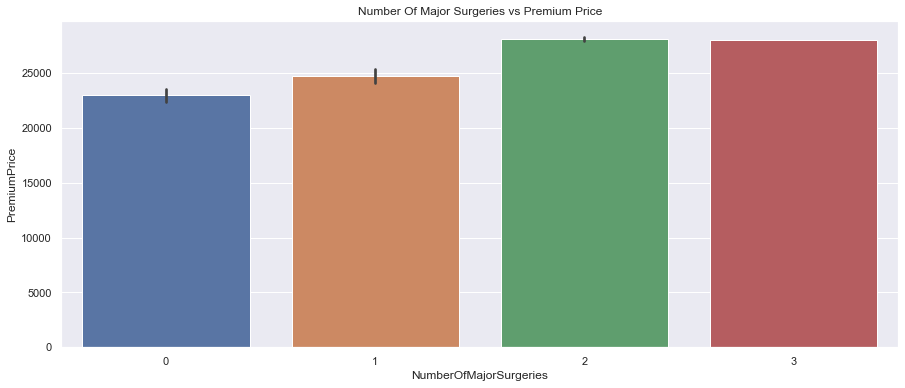

In [14]:
plt.figure(figsize=(15, 6))
x = "NumberOfMajorSurgeries"
y = "PremiumPrice"
sns.barplot(x, y, data=Dataset)
plt.title("Number Of Major Surgeries vs Premium Price")

From the above plot we can say "Premium price" is more for people with major surgeries compare to no surgery. 

## 6.Distribution of Age

Text(0.5, 1.0, 'Distribution of Age')

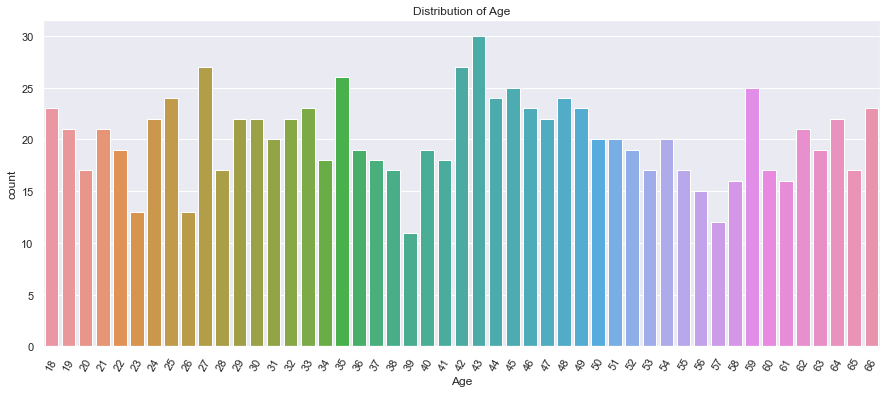

In [15]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=60)
sns.countplot(x="Age", data=Dataset)
plt.title("Distribution of Age")

## 7.Age Vs Premium Price

Text(0.5, 1.0, 'Age vs Premium Price')

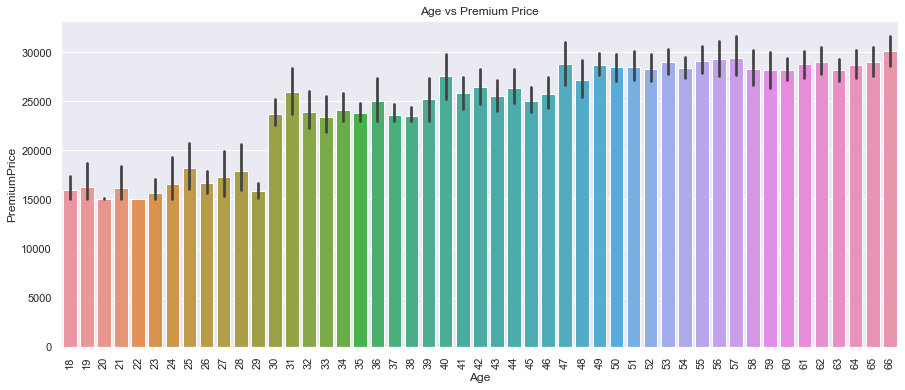

In [16]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
x = "Age"
y = "PremiumPrice"
sns.barplot(x, y, data=Dataset)
plt.title("Age vs Premium Price")

From the above plot we can say with increase in "Age" , the "Premium Price" also increase.

## 8.Distribution of Height

Text(0.5, 1.0, 'Distribution of Height')

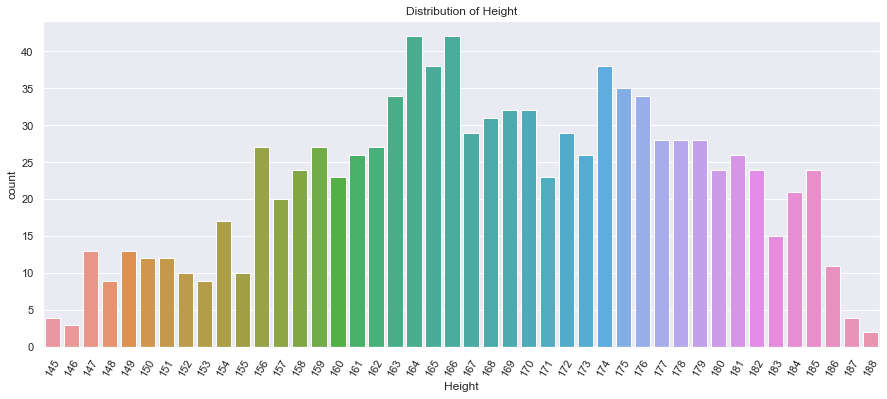

In [17]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=60)
sns.countplot(x="Height", data=Dataset)
plt.title("Distribution of Height")

## 9.Height vs Premium Price

Text(0.5, 1.0, 'Height vs Premium Price')

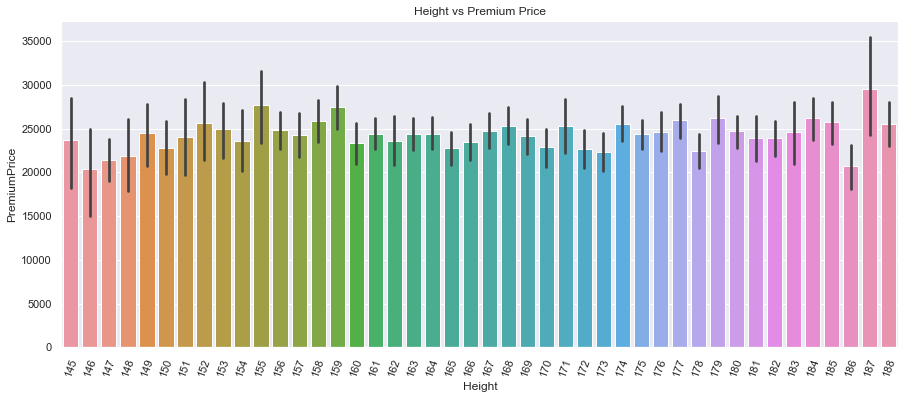

In [18]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=70)
x = "Height"
y = "PremiumPrice"
sns.barplot(x, y, data=Dataset)
plt.title("Height vs Premium Price")

From the above plot we can say there is little to no influence of increase in "Premium Price" with increase in "Height".

## 10.Distribution of Weight

Text(0.5, 1.0, 'Distribution of Weight')

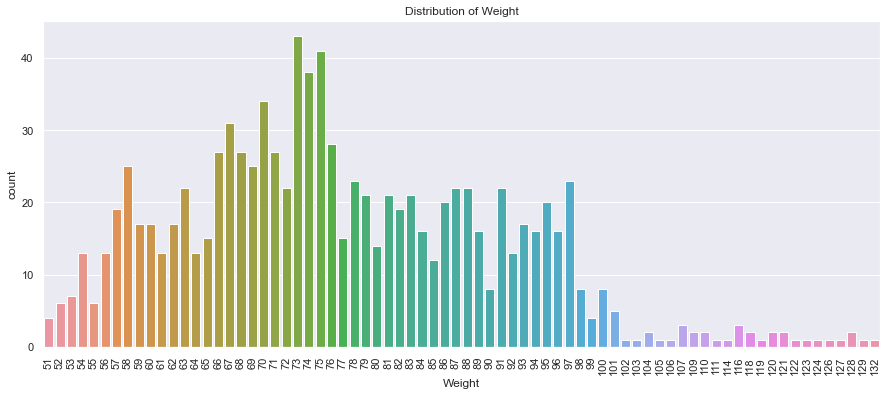

In [19]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
sns.countplot(x="Weight", data=Dataset)
plt.title("Distribution of Weight")

## 11.Weight vs Premium Price

Text(0.5, 1.0, 'Weight vs Premium Price')

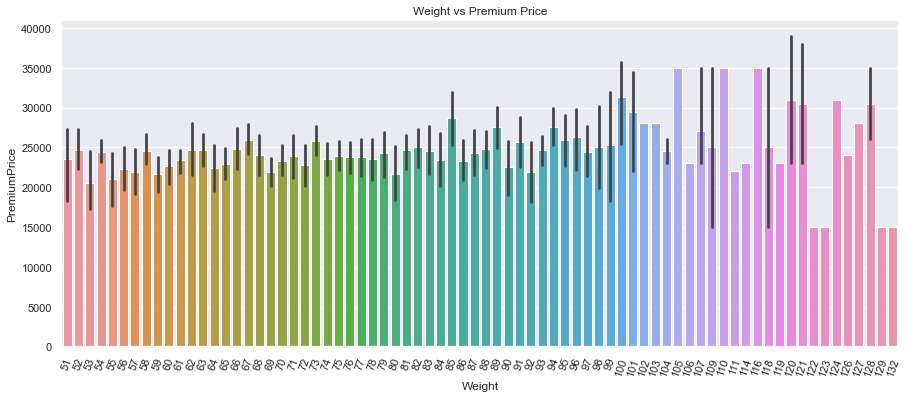

In [20]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=70)
x = "Weight"
y = "PremiumPrice"
sns.barplot(x, y, data=Dataset)
plt.title("Weight vs Premium Price")

From the above plot we can say there is little influence of increase in "Premium Price" with increase in "weight".

## 12.Further Analysis using one of the Machine learning method : Random Forest

In [21]:
X = Dataset.drop("PremiumPrice", axis=1)
y = Dataset.PremiumPrice

In [22]:
# Traning and Splitting the Dataset into 75 :25
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=43
)

In [23]:
#A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset 
# and uses averaging to improve the predictive accuracy and control over-fitting

Lr = RandomForestRegressor(n_estimators=50, max_depth=5)
Lr_model = Lr.fit(X_train, y_train)

In [24]:
print("Accuracy of the model on training Dataset ", Lr_model.score(X_train, y_train))
print("Accuracy of the model on Test Dataset ", Lr_model.score(X_test, y_test))

Accuracy of the model on training Dataset  0.8483734742060784
Accuracy of the model on Test Dataset  0.8108774582646996


## 13.Finding important features that influence Premium Price

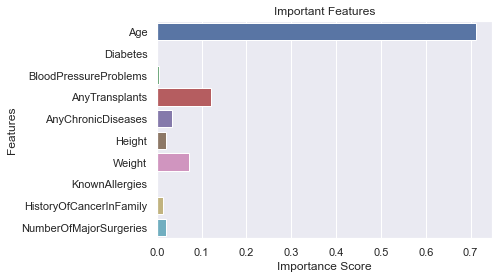

In [25]:
#Using the Feature importance to Extract the Importance of the Features.
feature_imp = Lr_model.feature_importances_
sns.barplot(x=feature_imp, y=X.columns)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Important Features")
plt.show()

From the above plot we can identify the important features that determine the Premium Price. From the above plot we can conclude the following:
    
    1. "Age" plays the most important role in determining the "Premium Price".
    
    2. "Any Tansplants", "Weight", "Anychronicdiseases" also influence the increase in "Premium Price".
    
    3. "Known Allergies", "Diabetes", "BloodPressureProblems" are least important features to determine "Premium Price".